In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import auc
from pathlib import Path
base_folder, thresholds_file = 'results/schaefer400', 'global_metrics.csv'
networks = ['', 'Cont', 'Default', 'DorsAttn', 'SalVentAttn']

In [2]:
def add_curve(thresholds, avg_clustering, lower_error, upper_error, group, ax):
    ax.plot(thresholds, avg_clustering, label=group)
    ax.plot(thresholds, lower_error, alpha=0.1)
    ax.plot(thresholds, upper_error, alpha=0.1)
    ax.legend()
    ax.fill_between(thresholds, lower_error, upper_error, alpha=0.2)

In [6]:
def plot_measure(base_folder, networks, measure_label, measure_desc):
    fig, axes = plt.subplots(figsize=(15, 15), nrows=len(networks) // 2 + 1, ncols=2)
    aucs = {network: {} for network in networks}
    for i, network in enumerate(networks):
        network_path = f'{base_folder}_{network}' if network else base_folder
        df = pd.read_csv(Path(network_path, thresholds_file), index_col=0)
        ax = axes[i // 2, i % 2]
        groups = df['group'].unique()
        for group in groups:
            group_metrics = df[df['group'] == group]
            thresholds = group_metrics['threshold'].values
            avg_clustering = group_metrics[measure_label].values
            lower_error, upper_error = group_metrics[measure_label] - group_metrics[f'{measure_label}_std'], group_metrics[measure_label] + group_metrics[f'{measure_label}_std']
            aucs[network][group] = auc(thresholds, avg_clustering)
            add_curve(thresholds, avg_clustering, lower_error, upper_error, group, ax)
    
        ax.set_title(f'Schaefer {network}')
        ax.set_xlabel('Threshold')
        ax.set_ylabel(measure_desc)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
    fig.suptitle(measure_desc)
    fig.savefig(f'results/schaefer400_{measure_label}.png')
    plt.show()
    
    return aucs

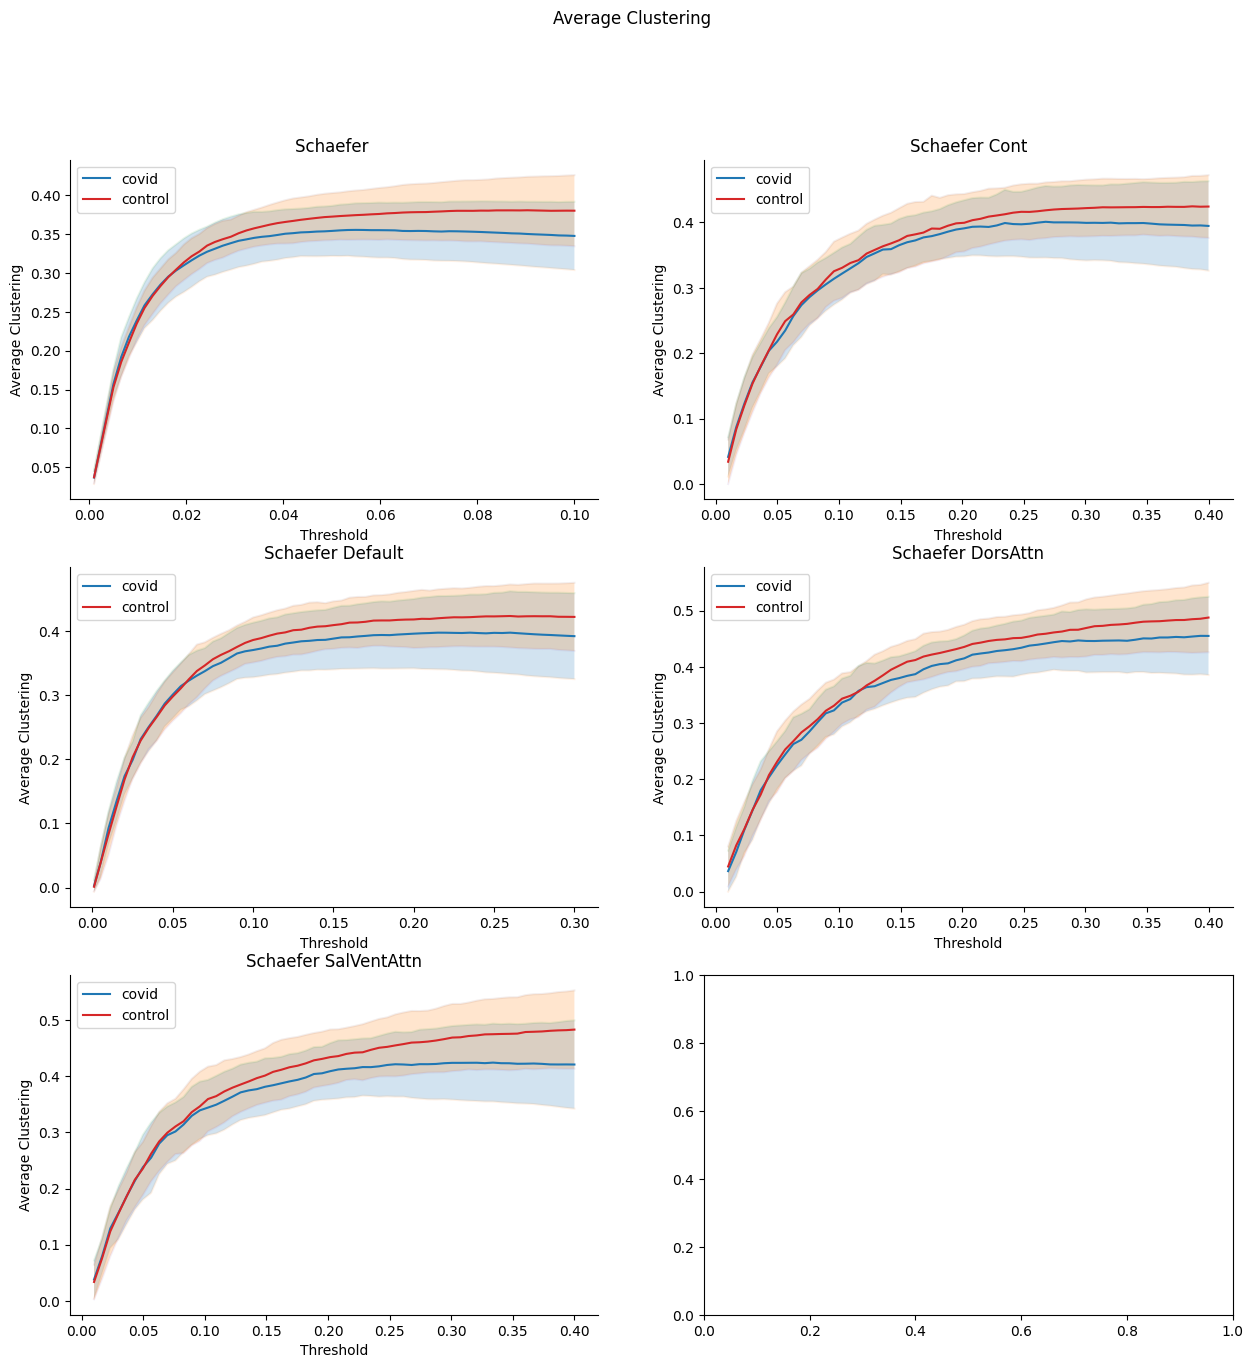

                      Cont   Default  DorsAttn  SalVentAttn
covid    0.03212  0.135534  0.104487  0.146247     0.143098
control  0.03373  0.140884  0.109362  0.153121     0.154123


In [8]:
aucs = plot_measure(base_folder, networks, 'avg_clustering', 'Average Clustering')
aucs = pd.DataFrame(aucs)
print(aucs)

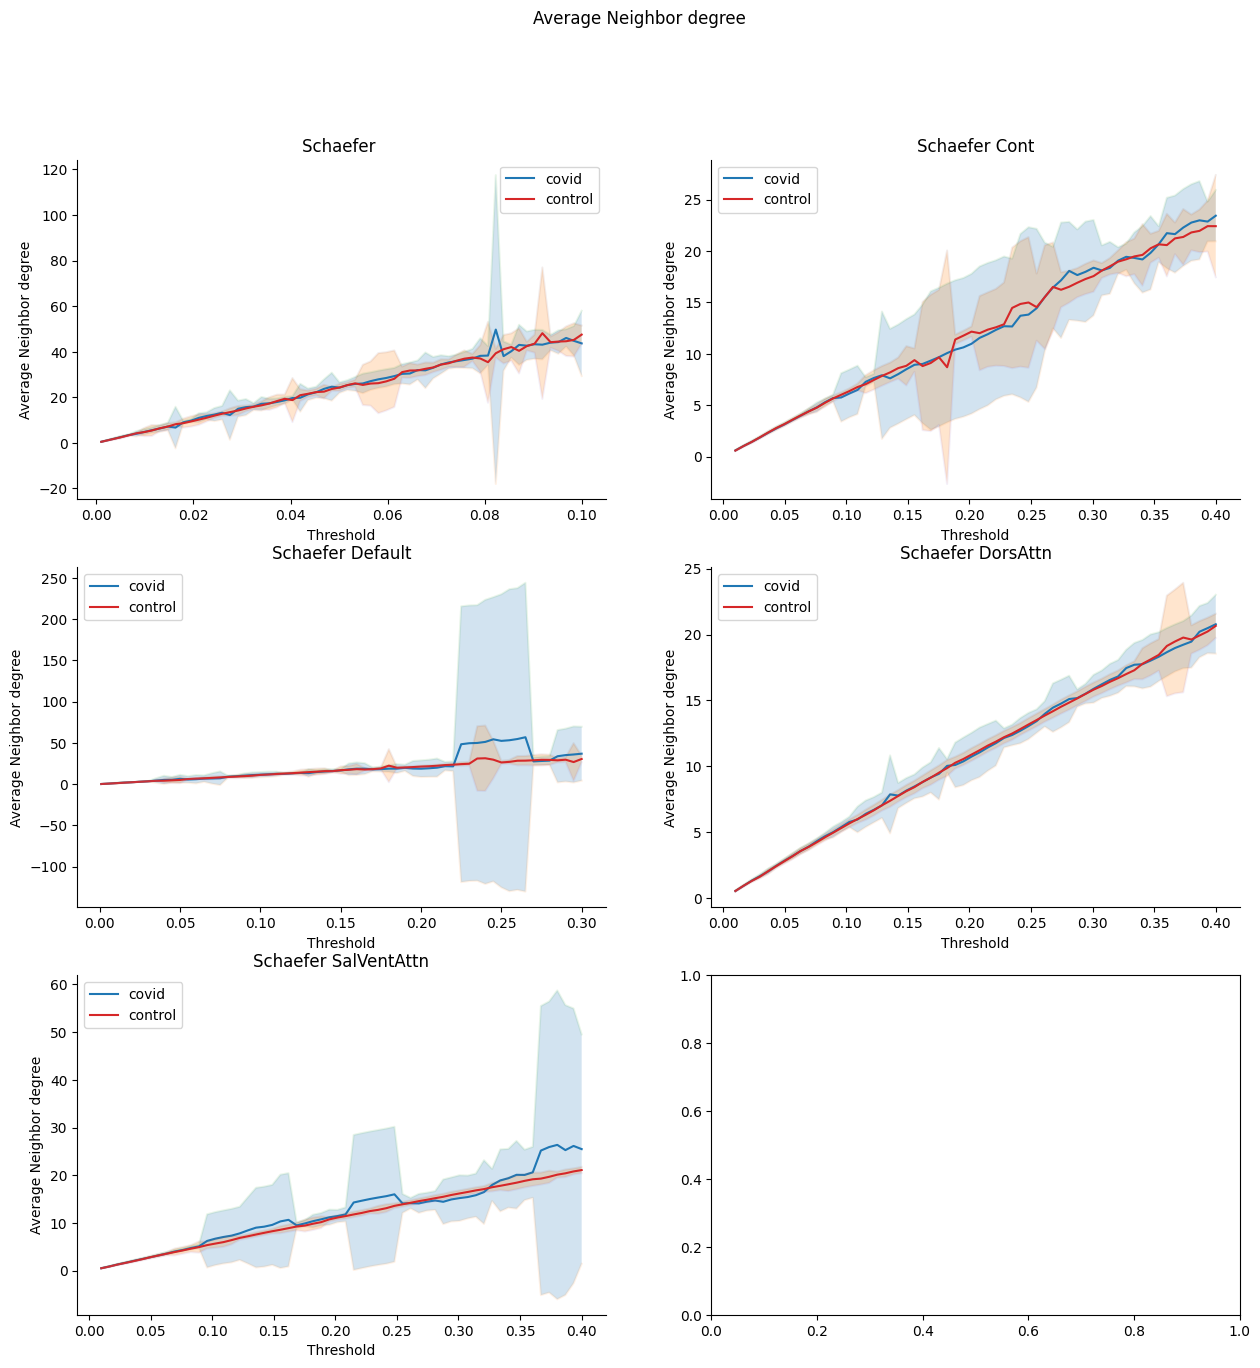

In [28]:
plot_measure(base_folder, networks, 'avg_neighbor_degree', 'Average Neighbor degree')